In [43]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

np.random.seed(0)
torch.manual_seed(0)

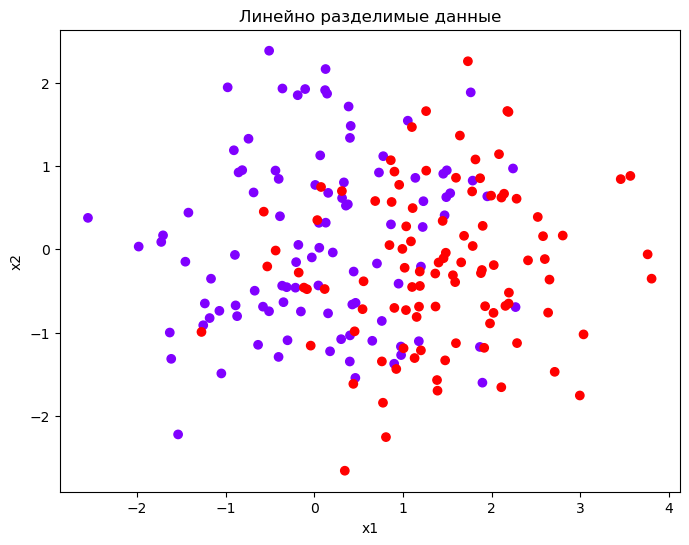

In [44]:
N = 100
D = 2
K = 2  

X_linear = np.zeros((N * K, D))
y_linear = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N*j, N*(j+1))
    X_linear[ix, 0] = np.random.randn(N) + j*1.5
    X_linear[ix, 1] = np.random.randn(N)
    y_linear[ix] = j

plt.figure(figsize=(8, 6))
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap=plt.cm.rainbow)
plt.title("Линейно разделимые данные")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [45]:
X_linear_t = torch.FloatTensor(X_linear)
y_linear_t = torch.LongTensor(y_linear)

model_linear = nn.Linear(2, 2) 

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_linear.parameters(), lr=0.1)


epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_linear(X_linear_t)
    loss = criterion(outputs, y_linear_t)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


with torch.no_grad():
    _, predicted_linear = torch.max(model_linear(X_linear_t), 1)
    accuracy_linear = (predicted_linear == y_linear_t).float().mean()

print("Accuracy:", accuracy_linear.item())

Epoch 0, Loss: 0.9753
Epoch 100, Loss: 0.4784
Epoch 200, Loss: 0.4784
Epoch 300, Loss: 0.4784
Epoch 400, Loss: 0.4784
Accuracy: 0.7649999856948853


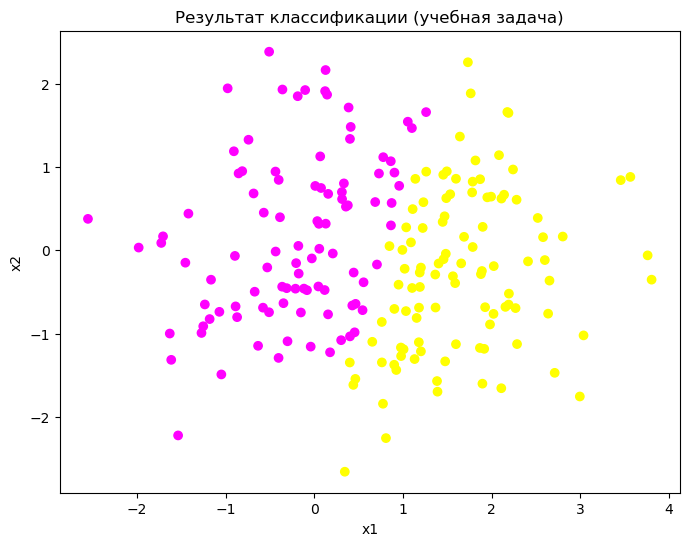

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=predicted_linear.numpy(), cmap=plt.cm.spring)
plt.title("Результат классификации (учебная задача)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

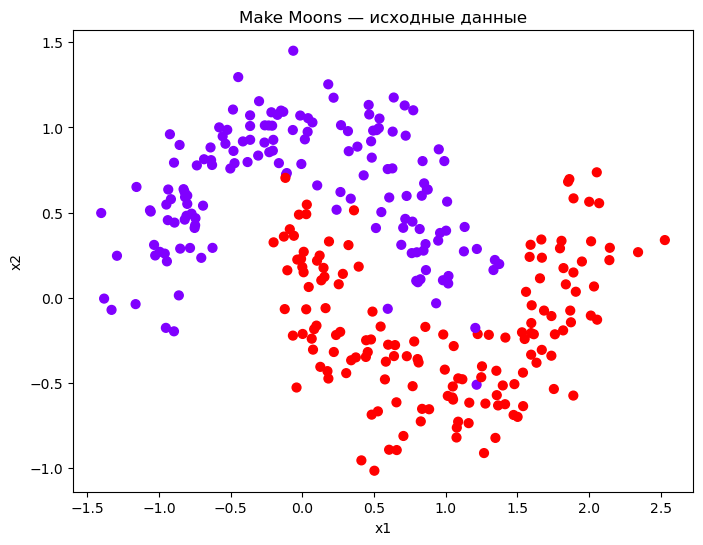

In [47]:
# Генерация данных make_moons
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=40, cmap=plt.cm.rainbow)
plt.title('Make Moons — исходные данные')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [48]:
X_moons_t = torch.FloatTensor(X_moons)
y_moons_t = torch.LongTensor(y_moons)

model_moons = nn.Linear(2, 2)  # 2 входа, 2 выхода

criterion_moons = nn.CrossEntropyLoss()
optimizer_moons = optim.Adam(model_moons.parameters(), lr=0.1)

epochs = 2000
for epoch in range(epochs):
    optimizer_moons.zero_grad()
    outputs = model_moons(X_moons_t)
    loss = criterion_moons(outputs, y_moons_t)
    loss.backward()
    optimizer_moons.step()
    
    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

with torch.no_grad():
    outputs = model_moons(X_moons_t)
    _, predicted_moons = torch.max(outputs, 1)
    accuracy_moons = (predicted_moons == y_moons_t).float().mean()

print("Accuracy:", accuracy_moons.item())

Epoch 0, Loss: 0.6349
Epoch 200, Loss: 0.2999
Epoch 400, Loss: 0.2999
Epoch 600, Loss: 0.2999
Epoch 800, Loss: 0.2999
Epoch 1000, Loss: 0.2999
Epoch 1200, Loss: 0.2999
Epoch 1400, Loss: 0.2999
Epoch 1600, Loss: 0.2999
Epoch 1800, Loss: 0.2999
Accuracy: 0.846666693687439


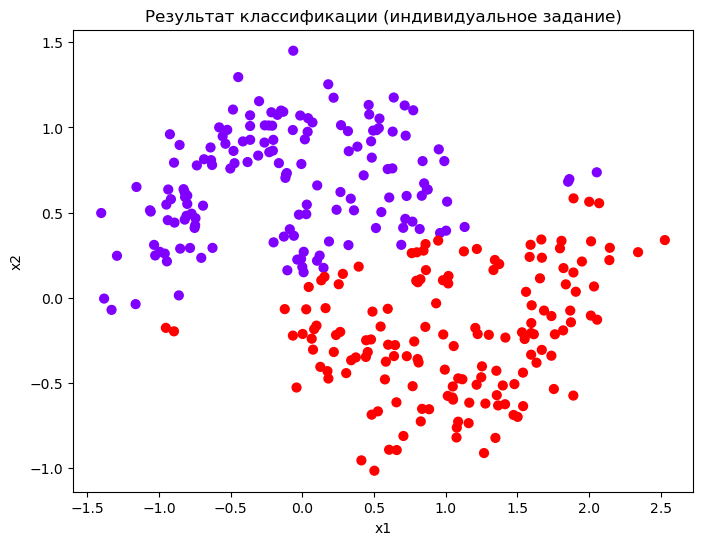

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=predicted_moons.numpy(), s=40, cmap=plt.cm.rainbow)
plt.title('Результат классификации (индивидуальное задание)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()